[[31.474 39.340 55.086 32.686]
 [7.597 16.646 30.926 32.686]
 [6.771 12.591 26.771 32.686]
 [15.837 19.477 29.434 32.686]]
[[7.930 9.705 14.395 15.868]
 [2.947 6.343 13.038 15.868]
 [2.003 5.881 17.321 15.868]
 [3.997 6.915 17.217 15.868]]
[[0.502 0.436 0.322 0.000]
 [0.475 0.379 0.236 0.000]
 [0.343 0.261 0.038 0.000]
 [0.271 0.210 0.006 0.000]]
[[0.275 0.304 0.363 0.335]
 [0.125 0.201 0.315 0.335]
 [0.087 0.175 0.348 0.335]
 [0.127 0.190 0.342 0.335]]


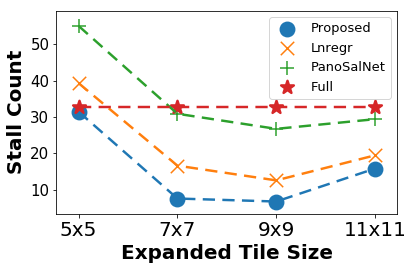

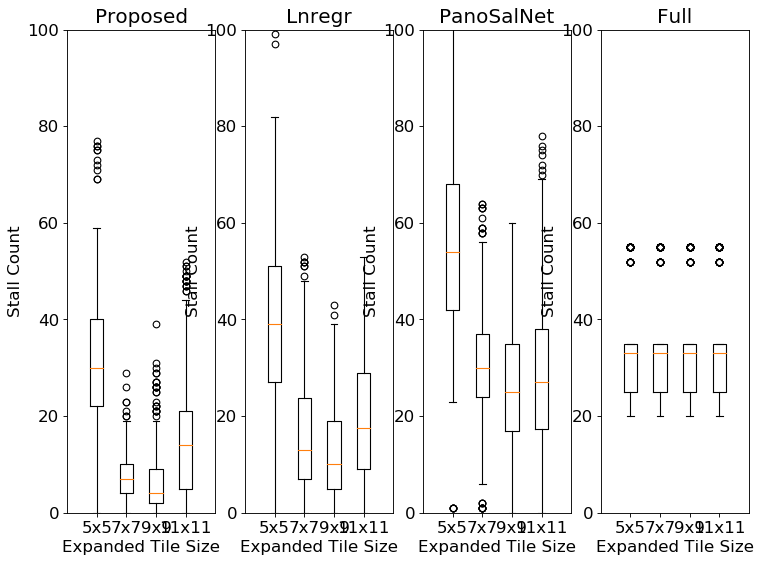

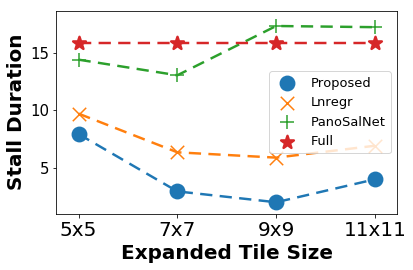

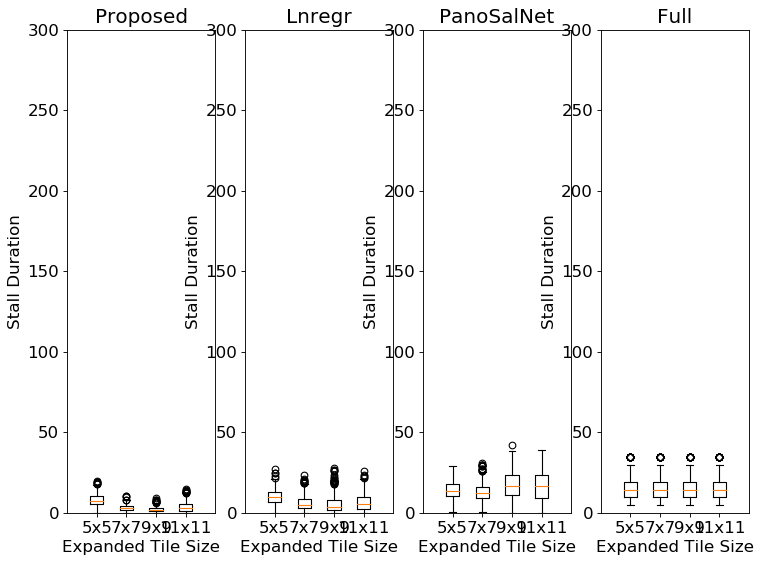

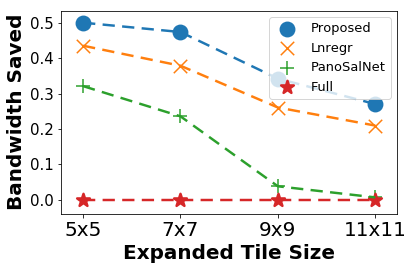

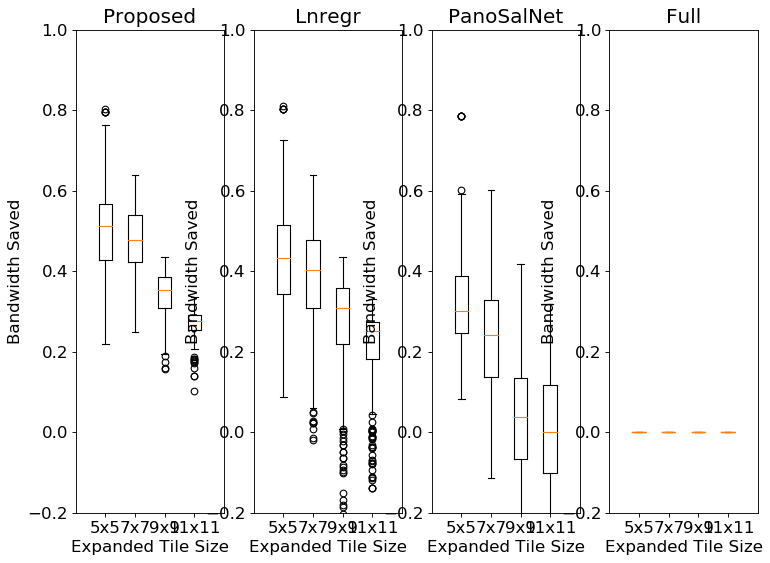

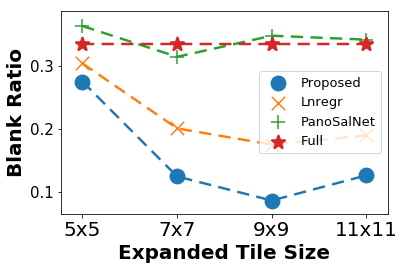

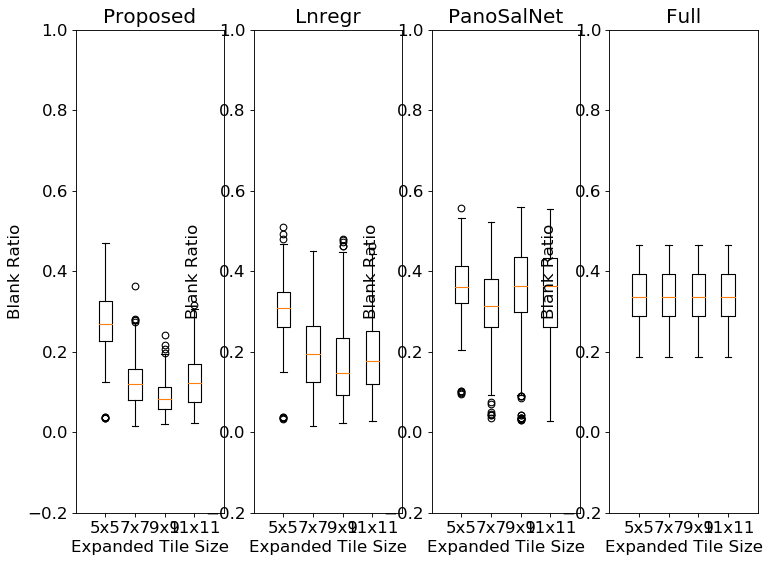

In [12]:
import test_simulator_lib
import imp
imp.reload(test_simulator_lib)
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
look_ahead = 16
scale_mean = 22.5#8.5 #possible values are 8.5, 22.5, 44.5, replace to generate different graph
scale_std = 4.5
bwscale = '{}_{}'.format(scale_mean, scale_std)
RAD_list = [2, 3, 4, 5]
radlist_str = '_'.join(map(str, RAD_list))
lstm_log, lnregr_log, sal_log, full_log = test_simulator_lib.load_log('test1', radlist_str, look_ahead, bwscale)

col_title=['a', 'b', 'c', 'd', 'e']
xlabel_list=['Stall count', 'Stall duration', 'Start time', 'Bandwidth saved', 'Blank ratio']
xticks=['5x5', '7x7', '9x9', '11x11']
x = np.arange(len(xticks))
xlabel='Expanded Tile Size'
modelname_list = ['Proposed', 'Lnregr', 'PanoSalNet', 'Full']

        
col = 0#showing just the stalling count
title = 'fig_Stall_Count_{}_{}'.format(scale_mean, scale_std).replace('.', '_')
y_list = np.array([[log[rad][:, col] for rad in RAD_list] for log in [lstm_log, lnregr_log, sal_log, full_log]])
test_simulator_lib.plot_log(plt, x, xticks, y_list, modelname_list, title=title, xlabel=xlabel, ylabel='Stall Count', axis=[0, 5, 0, 100])   
print y_list.T.mean(axis=0)

col = 1#showing just the stalling duration
title = 'fig_Seconds_{}'.format(scale_mean, scale_std).replace('.', '_')
y_list = np.array([[log[rad][:, col] for rad in RAD_list] for log in [lstm_log, lnregr_log, sal_log, full_log]])
test_simulator_lib.plot_log(plt, x, xticks, y_list, modelname_list, title=title, xlabel=xlabel, ylabel='Stall Duration', axis=[0, 5, 0, 300])  
print y_list.T.mean(axis=0)

col = 3#showing just the bandwidth saved
title = 'fig_Bandwidth_Saved_{}_{}'.format(scale_mean, scale_std).replace('.', '_')
y_list = np.array([[log[rad][:, col] for rad in RAD_list] for log in [lstm_log, lnregr_log, sal_log, full_log]])
y_list2 = 1 - y_list/y_list[-1].max(axis=0)
test_simulator_lib.plot_log(plt, x, xticks, y_list2, modelname_list,  title=title, xlabel=xlabel, ylabel='Bandwidth Saved', axis=[0, 5, -0.2, 1])  
print y_list2.T.mean(axis=0)

col = 4#showing just the blank ratio
title = 'fig_Blank_Ratio_{}_{}'.format(scale_mean, scale_std).replace('.', '_')
y_list = np.array([[log[rad][:, col] for rad in RAD_list] for log in [lstm_log, lnregr_log, sal_log, full_log]])
y_list2 = 1. - y_list
test_simulator_lib.plot_log(plt, x, xticks, y_list2, modelname_list,  title=title, xlabel=xlabel, ylabel='Blank Ratio', axis=[0, 5, -0.2, 1])  
print y_list2.T.mean(axis=0)

In [6]:
#At 9x9 configuration, compared with linear baseline
#stall count 6.771 12.591
#stall duration 2.003 5.881
#bandwidth saved: 0.343 0.261
#blank ratio: 0.087 0.175


350

0.6629382506423658
0.6178220086483369
0.49818825366190833
0.512214623015095


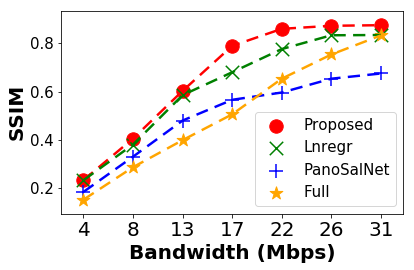

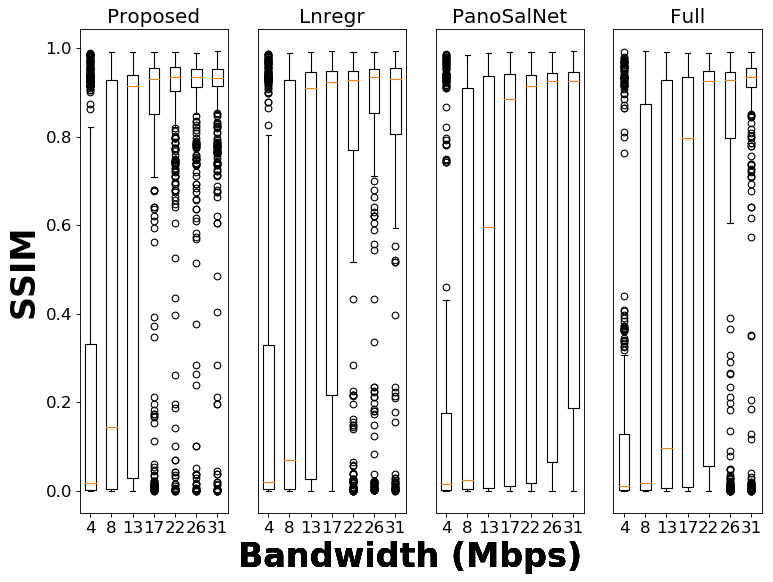

In [32]:
RAD=4
look_ahead = 16

bw_std = 3
bw_meanlist = [4.0, 8.5, 13.0, 17.5, 22.0, 26.5, 31.0]
scale_list = np.array([[bw_mean, bw_std] for bw_mean in bw_meanlist])
bwscalelist_str = '_'.join(map(str, bw_meanlist))

#ssim_list = pickle.load(open('./result/SSIM_rad4_look16'))
ssim_list = test_simulator_lib.load_ssim(RAD, look_ahead, bwscalelist_str)
color_list = ['red', 'green', 'blue', 'orange']
modelname_list = ['Proposed', 'Lnregr', 'PanoSalNet', 'Full']


xticks = np.array(bw_meanlist, dtype=np.int)
x = np.arange(len(xticks))
marker_list = ['o', 'x', '+', '*']
for idx, imodel in enumerate(range(len(ssim_list))):
    y = []
    for jbw in range(len(ssim_list[0])):
        temp = ssim_list[imodel][jbw][:, 1].mean()
        y.append(temp)
    

    plt.plot(x, y, color=color_list[imodel], linestyle='--', dashes=(5, 3), linewidth=2.45)
    plt.scatter(x, y, color=color_list[imodel], label=modelname_list[imodel], s=180, marker=marker_list[idx])
    #plt.title('SSIM with different bandwidth for {}'.format(modelname_list[imodel]))
plt.xticks(x, xticks, fontsize=20)
plt.ylabel('SSIM', fontsize=20, fontweight='bold')
plt.xlabel('Bandwidth (Mbps)', fontsize=20, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig('./figs/fig_SSIM_plot.pdf', format='pdf', dpi=1000)

    
  

fig=plt.figure(figsize=(11, 8), dpi= 80, facecolor='w', edgecolor='k')  
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
#plt.xlabel('Bandwidth (Mbps)', fontsize=20)
for imodel in range(len(ssim_list)):
    plt.subplot(1, len(ssim_list), imodel+1)
    
    y = [ssim_list[imodel][jbw][:, 1].tolist() for jbw in range(len(ssim_list[0]))]#number of bw data points
    print np.mean(y)
    plt.boxplot(y)
    if imodel == 0: plt.ylabel('SSIM', fontsize=30, fontweight='bold')
    else: plt.yticks([])
    fig.text(0.5, 0.04, 'Bandwidth (Mbps)', ha='center', fontsize=30, fontweight='bold')
    plt.xticks(x+1, xticks)
    plt.title('{}'.format(modelname_list[imodel]))
    plt.savefig('./figs/fig_SSIM_boxlot.pdf', format='pdf', dpi=1000)

    


